# Lab 14

Today, we will start exploring another method for classification **_Support Vector Machines_** or SVM. Before we dig into SVMs, we will start with how to evaluate classification results. Today's goals are: 

0. Explain how to evaluate models in the classification task
1. Define Maximal Margin
2. Motivate SVM


## Thoughts on Cross Val

Before starting with today's topics, let's talk about cross val. Consider two questions: 
* Which is better: $k$-fold or LOOCV? Why? 
* Is there a comparison to the _process_ of cross val to gradient descent (ie. mini-batch and stochastic)?

**_4 mins for class discussion_**

## Evaluating Methods for Classification 

Classification and prediction are often seen as two different and distinct parts of supervised machine learning. One of the biggests differences has to do with the notion of "close". In prediction, a model can be _close_ but not exactly on truth to be considered "good enough." However for classification, we are placing objects into distinct groups and there is no notion of "close enough." For example, one either plays for the Washington Nationals or they don't. In professional baseball, there is no notion of playing part time for two teams. 

With this difference in mind, how do we evaluate our methods for classification tasks? Let's start with a specific evaluation metric MSE and adjust this for classification. We begin by recalling the equation for MSE for prediction:

\begin{equation}
MSE_{\textrm{prediction}} = avg(||truth-guess||^2)
\end{equation}

In classification, we have _predicted classes_ and the _true classes_ of each data point. How might we adjust the above for classification? 

Take a minute to jot down your thoughts and we'll come back together to discuss: 

\begin{equation}
MSE_{\textrm{classification}} = \textbf{????}
\end{equation}

### Indicator functions

One trick that we use in machine learning over and over again are **indicator functions**. Simply indicator functions _indicate_ something. We often use them in a similar way to boolean functions. 

## Motivating SVM 

Today, we are going to start looking at Support Vector Machines (or SVMs). SVM is a method for classification. As with kNN, we will work on examples that split our data into two classes. 

Last week, we focused on the motivating the differences between the train and test phases in supervised learning from the perspective of reaching for the truth underlying our data. In classification, we can use the same lens; we are seeking not to just divide the data that we have into two groups, but rather to find the true boundary that exists between the territory of the two groups. For example, instead of just trying to classify people into what state they live in based on their location, can we use the locations of where people live to find the state boundaries? 

### Imports for Today

Today we are working with two new (constructed) datasets. 

We begin as usual, importing the packages and data that we need. Plot the first dataset `new_data` and note at least 2 observations about the data. 

In [1]:
## Import block
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
from numpy import linalg as LA
import pandas as pd

import random 

from sklearn import linear_model

In [ ]:
## Functions for later use

def assign_class(datapoint, slope, intercept):
    pass

def classification_mse(class_truth, pred_class):
    pass


In [ ]:
# For function testing 




In [7]:
## Import Data

new_data = pd.read_csv("lab14data.csv", sep = ",")
new_data_np = np.genfromtxt("lab14data.csv", delimiter=',', skip_header=1)

extra_data = pd.read_csv("extra_lab14data.csv", sep = ",")
extra_data_np = np.genfromtxt("extra_lab14data.csv", delimiter=',', skip_header=1)

## x-values for plotting
x = np.linspace(-3.1,3.15,1000)

In [ ]:
# Plot new_data
#
# What do you notice? 

### Example boundaries 

With the goal of dividing the space into two territories. Which of the below options do you think is best?

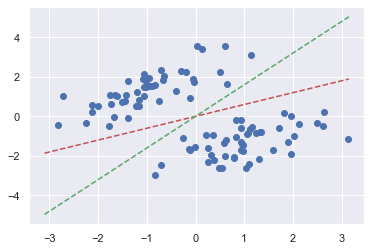

In [19]:
# Possible boundaries:

plt.scatter(new_data["myst"],new_data["mysty"])
plt.plot(x,0.6*x,linestyle='dashed',c="r")
plt.plot(x,1.6*x,linestyle='dashed',c="g")

**Question** - What do you like about each of these lines? Is one better than another? 

(Notes for you!)

Let's consider another option: 

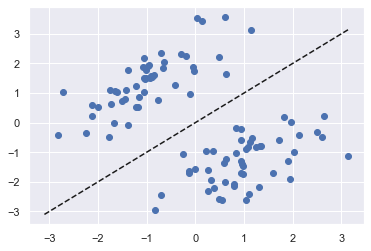

In [20]:
plt.scatter(new_data["myst"],new_data["mysty"])
plt.plot(x,x,linestyle='dashed',c="k")


**Question** - What do you like about this line? Is this one better than the others? 

(Notes for you!)

## Maximal Margin

In dividing a data space into two "territories", we want to consider which line would create the widest boundary between our two data groups. The way that I think about it is how much can we inflate each line before the inflated line touches the data. 

To visualize this, we will use the method `fill_between`:

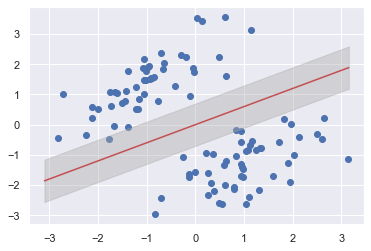

In [24]:
# Inflating the red boundary:
inflate_width = 0.7

plt.scatter(new_data["myst"],new_data["mysty"])
plt.plot(x,0.6*x,'-r')
plt.fill_between(x, 0.6*x - inflate_width, 0.6*x + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

Does this margin touch/include any data points? 

Play with the `inflate_width` for this example to find a good value for this parameter that is as big as possible without touching the data. 

Repeat this process for the green and black lines below. According to your experiments, which has the widest possible inflation? 

In [ ]:
# Inflating the green boundary:
inflate_width = ?????

plt.scatter(new_data["myst"],new_data["mysty"])
plt.plot(x,1.6*x,'-g')
plt.fill_between(x, 1.6*x - inflate_width, 1.6*x + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

In [25]:
# Inflating the green boundary:
inflate_width = ?????

plt.scatter(new_data["myst"],new_data["mysty"])
plt.plot(x,x,'-k')
plt.fill_between(x, x - inflate_width, x + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

SyntaxError: invalid syntax (<ipython-input-25-5eeb6f1a88a8>, line 2)

### Maximal Margin Defintion

The maximal margin is simply the biggest margin that we can place **between** our two groups. We build this margin by finding a central line and then inflating it equally in both directions. 

We can define the maximal margin for higher dimensions beginning with a plane (or hyperplane) and inflating it in the same manner. 

### Testing our Maximal Margins

It turns out that we have a bit of extra data, and true to the train/test paradigm, let's see how our best line does with this extra data: 

In [34]:
# Training data
plt.scatter(new_data["myst"],new_data["mysty"], 
            c=new_data["group"], cmap = "spring")

# Testing data
plt.scatter(extra_data["myst"],extra_data["mysty"], 
            c=extra_data["group"], cmap = "spring")

## Your line and inflated part here - 
inflate_width = ???
plt.plot(x, ???, '-?') 
plt.fill_between(x, ??? - inflate_width, ??? + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

SyntaxError: invalid syntax (<ipython-input-34-791b2f66a154>, line 10)

### Violations to the Margin

Notice that we have some colors on the wrong side of the line. This tells use that perhaps our margin does not generalize to new data very well. Let's count how well it did on just the test data. 

For the below plot:
* Count how many data points are on the wrong "side" of the line
* Count how many data points are on the right "side" of the line BUT are within the margin

Both of these are violations to the maximal margin, but of different intensities. 

In [ ]:
# Counting violations

# Testing data
plt.scatter(extra_data["myst"],extra_data["mysty"], 
            c=extra_data["group"], cmap = "spring")

## Your line and inflated part here - 
inflate_width = ???
plt.plot(x, ???, '-?') 
plt.fill_between(x, ??? - inflate_width, ??? + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

**Question:** Given these counts and this plot, do you think this is a good margin? 

(Notes for you)



**Question:** Can you alter the width of the margin to have less violations within the margin? (Try this below.) 


In [ ]:
# Varying the margin width 

# Testing data
plt.scatter(extra_data["myst"],extra_data["mysty"], 
            c=extra_data["group"], cmap = "spring")

## Your line and inflated part here - 
inflate_width = ???
plt.plot(x, ???, '-?') 
plt.fill_between(x, ??? - inflate_width, ??? + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

#### Trying other boundaries

Returning to our other examples from earlier, is either of the other two options a "better" margin? In other words, if we use either of the other lines as the boundary, can we have a wider margin with the same (or fewer) violations in the test set? 



In [ ]:
# Varying the margin width for a first other option 

# Testing data
plt.scatter(extra_data["myst"],extra_data["mysty"], 
            c=extra_data["group"], cmap = "spring")

## Your line and inflated part here - 
inflate_width = ???
plt.plot(x, ???, '-?') 
plt.fill_between(x, ??? - inflate_width, ??? + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

In [ ]:
# Varying the margin width for second other option 

# Testing data
plt.scatter(extra_data["myst"],extra_data["mysty"], 
            c=extra_data["group"], cmap = "spring")

## Your line and inflated part here - 
inflate_width = ???
plt.plot(x, ???, '-?') 
plt.fill_between(x, ??? - inflate_width, ??? + inflate_width, 
                 edgecolor='none', color='#AAAAAA', alpha=0.4)

#### Best Margin?

Which one is the best? What makes you say that? 


**Note:** In this exploration we have used the _test_ set to inform our discussion about which is the "best" margin. We did this for the purpose of _motivating_ SVM. In the usual set-up, the test set would **not** be involved with deciding the maximal margin. 

## Maximal Margins --> SVM 

SVM is _**relaxation**_ of the maximal margin. Recall that maximal margins are between two classes, which means that they do not allow for any violations, either in the margin or crossing the middle boundary. In SVM, we seek to balance 1) finding the widest margin and 2) limiting (but allowing) violations to the boundary. 

For SVM, we follow the usual procedure for supervised learning. We first divide our data into training and testing data. Then we find the best margin based on the training data and evaluate how well it did on the test set. 

In preparation for implementing SVM, let's begin by creating a function that assigns each data point to a class based on it's relationship to the boundary line. If the datapoint is above the boundary assign it to class `0` and if it is below assign it to class `0`. There is a start of function above called `assign_class`. 

### Next time

Next time, we will implement SVM and discuss how **kernals** are central to SVM.

### Final Thoughts

To finish up this lab, complete definitions for `assign_class` and `classification_mse`. Then compute the classification test MSE for each of the three potential lines and declare which of these three boundaries is the "best." Finally justify your declaration. Share your thoughts in a post on **#lab_submission** channel on slack with your answer. Your post must start with **Lab14** to get credit.  

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab14**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources consulted 

0. [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/)
1. [SDS 293 Notes by R. Jordan Crouser](http://www.science.smith.edu/~jcrouser/SDS293/)
2. [In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)